In [ ]:
import tensorflow as tf
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/Taka_Dataset_Final_project.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir='/content/Taka_Dataset'

In [ ]:
IMAGE_SIZE=300
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,

    validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(

     base_dir,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE,
     subset="training")

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'


)

Found 4892 images belonging to 2 classes.
Found 1221 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from glob import glob


In [ ]:
IMAGE_SIZE=[300,300]
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

80134624/80134624 [==============================] - 5s 0us/step


<KerasTensor: shape=(None, 9, 9, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
folder=glob(r"/content/Taka_Dataset/*")
len(folder)

2

In [ ]:
dropout=0.5
x=Flatten()(vgg.output)
x=Dropout(dropout)(x)
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epoch=25

history=model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/25
77/77 [==============================] - 308s 4s/step - loss: 0.4572 - accuracy: 0.8183 - val_loss: 0.5640 - val_accuracy: 0.5815
Epoch 2/25
77/77 [==============================] - 261s 3s/step - loss: 0.2408 - accuracy: 0.9103 - val_loss: 0.5743 - val_accuracy: 0.5839
Epoch 3/25
77/77 [==============================] - 254s 3s/step - loss: 0.1999 - accuracy: 0.9238 - val_loss: 0.5919 - val_accuracy: 0.7437
Epoch 4/25
77/77 [==============================] - 253s 3s/step - loss: 0.1562 - accuracy: 0.9450 - val_loss: 0.6887 - val_accuracy: 0.6855
Epoch 5/25
77/77 [==============================] - 253s 3s/step - loss: 0.1636 - accuracy: 0.9383 - val_loss: 0.4533 - val_accuracy: 0.8002
Epoch 6/25
77/77 [==============================] - 254s 3s/step - loss: 0.1386 - accuracy: 0.9493 - val_loss: 0.4360 - val_accuracy: 0.7101
Epoch 7/25
77/77 [==============================] - 252s 3s/step - loss: 0.1396 - accuracy: 0.9497 - val_loss: 0.5774 - val_accuracy: 0.7437
Epoch 8/25
77

In [ ]:
loss_train, accuracy_train = model.evaluate_generator(train_generator)
loss_val, accuracy_val = model.evaluate_generator(validation_generator)
total_samples = train_generator.samples + validation_generator.samples
total_accuracy = (accuracy_train * train_generator.samples + accuracy_val * validation_generator.samples) / total_samples

print("Total Accuracy:", total_accuracy)

<ipython-input-15-ea59283b7cd5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_train, accuracy_train = model.evaluate_generator(train_generator)
<ipython-input-15-ea59283b7cd5>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_val, accuracy_val = model.evaluate_generator(validation_generator)


Total Accuracy: 0.9546867379010376


In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/my_FinalProjectmodelVgg19_final.h5')

1/1 [==============================] - 0s 226ms/step
[[9.999970e-01 3.034533e-06]]
Fake Money


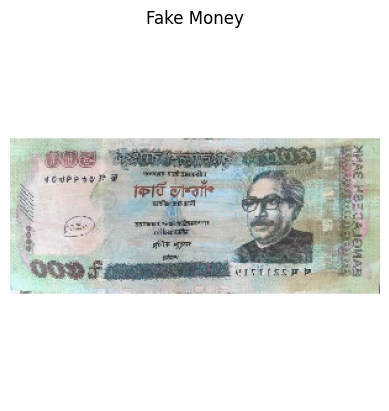

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import keras.utils as image

model1 = load_model('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/my_FinalProjectmodelVgg19_final.h5')
img_pred = image.load_img(r"/content/drive/MyDrive/Colab Notebooks/Final Project_2023/test/500tk_fake-71-_png_jpg.rf.9147d6d32546557ff0817637ba0c2e1e.jpg", target_size=(300, 300))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

result = model1.predict(img_pred)
print(result)

if result[0][0] > result[0][1]:
    prediction = "Fake Money"
else:
    prediction = "Real Money"

print(prediction)

# Display the image
plt.imshow(img_pred[0])
plt.title(prediction)
plt.axis('off')
plt.show()
